# Workshop 1: Mobile Price Range Classification

In this workshop we will learn how to train a neural network with numeric data as input to predict the price range of mobile phones ([info of the data](https://www.kaggle.com/iabhishekofficial/mobile-price-classification/data#)). The main blocks of the workshop are:

1. Get the data from Google Drive.
2. Load and Pre-process the data.
3. Define a Fully Connected Neural Network.
4. Choose loss function and optimizer.
5. Train the network.

The main libraries thar will be used in the workshop are:

- Tensorflow
- Keras
- Sci-kit Learn
- Matplotlib
- Numpy
- Pandas

[Reference](https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5)

## 1. Get the data from Google Drive

In [1]:
# Import libraries to interact with Google Drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [2]:
# Authenticate with your Google account to get access to the data
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
# Download data
download = drive.CreateFile({'id': '1igTyUp-YTHG0ig9VeNu83R8jBWn5Djji'})
download.GetContentFile('mobile_price.zip')

In [4]:
# Extract data from zip file
import zipfile
from pathlib import Path
data_path = Path("./mobile_price.zip")

with zipfile.ZipFile(str(data_path), 'r') as zip_ref:
    zip_ref.extractall("./data")

In [5]:
# List files of ./data directory
!ls ./data

test.csv  train.csv


## 2. Load and Pre-process the data



In [6]:
# Load dependencies for loading data
import numpy as np
import pandas as pd

In [7]:
# Load training dataset and check variables
dataset = pd.read_csv('./data/train.csv')

In [8]:
# Show variables
dataset.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [9]:
# Show first 5 rows
dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [10]:
# Import dependencies for pre-processing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [11]:
# Convert pandas Dataframe to Numpy Array
dataset_numpy = dataset.values

In [12]:
# Show data type before and after conversion
print(type(dataset))
print(type(dataset_numpy.dtype))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.dtype[float64]'>


In [13]:
# Separate input variables from output label
X = dataset_numpy[:, :20]
y = dataset_numpy[:, 20:21]

print(y)

[[1.]
 [2.]
 [2.]
 ...
 [3.]
 [0.]
 [3.]]


In [14]:
# Show shape of training data and labels
print("Shape of training data: ", X.shape)
print("Shape of training labels: ", y.shape)

Shape of training data:  (2000, 20)
Shape of training labels:  (2000, 1)


In [15]:
# Show different classes to predict
np.unique(y)

array([0., 1., 2., 3.])

In [16]:
# Normalizing the data to improve stability while training
sc = StandardScaler()
sc.fit(X)
X_norm = sc.transform(X)

In [17]:
# Show mean and Standard Deviation learnt from training data
print("Mean per variable: \n", sc.mean_)
print("Standard Deviation per variable: \n", sc.scale_)

Mean per variable: 
 [1.2385185e+03 4.9500000e-01 1.5222500e+00 5.0950000e-01 4.3095000e+00
 5.2150000e-01 3.2046500e+01 5.0175000e-01 1.4024900e+02 4.5205000e+00
 9.9165000e+00 6.4510800e+02 1.2515155e+03 2.1242130e+03 1.2306500e+01
 5.7670000e+00 1.1011000e+01 7.6150000e-01 5.0300000e-01 5.0700000e-01]
Standard Deviation per variable: 
 [4.39308338e+02 4.99974999e-01 8.15800182e-01 4.99909742e-01
 4.34035825e+00 4.99537536e-01 1.81411780e+01 2.88343437e-01
 3.53908039e+01 2.28726469e+00 6.06279867e+00 4.43669852e+02
 4.32091384e+02 1.08446083e+03 4.21219156e+00 4.35530837e+00
 5.46258904e+00 4.26166341e-01 4.99991000e-01 4.99950998e-01]


In [18]:
# Show data before and after normalization
print("Before normalization: \n", X[1, :])
print("After normalization: \n", X_norm[1, :])

Before normalization: 
 [1.021e+03 1.000e+00 5.000e-01 1.000e+00 0.000e+00 1.000e+00 5.300e+01
 7.000e-01 1.360e+02 3.000e+00 6.000e+00 9.050e+02 1.988e+03 2.631e+03
 1.700e+01 3.000e+00 7.000e+00 1.000e+00 1.000e+00 0.000e+00]
After normalization: 
 [-0.49513857  1.0100505  -1.2530642   0.98117712 -0.99289039  0.95788598
  1.15502422  0.68754816 -0.12005944 -0.66476784 -0.64598879  0.58577791
  1.70446468  0.46731702  1.11426556 -0.63531667 -0.73426721  0.55964063
  0.99401789 -1.01409939]


In [19]:
# One-hot encoding of labels
onehot_enc = OneHotEncoder()
y_onehot = onehot_enc.fit_transform(y).toarray()

In [20]:
# Show labels before and after one-hot encoding
print("Before onet-hot encodeing: \n", y[0])
print("After onet-hot encodeing: \n", y_onehot[0])

Before onet-hot encodeing: 
 [1.]
After onet-hot encodeing: 
 [0. 1. 0. 0.]


In [21]:
# Split data in training and validation partitions
X_train, X_val, y_train, y_val = train_test_split(X_norm, y_onehot, 
                                                  test_size=0.1)

In [22]:
# Show sizes of partitions
print("Size of training data: ", X_train.shape)
print("Size of training labels: ", y_train.shape)
print("Size of validation data: ", X_val.shape)
print("Size of validation labels: ", y_val.shape)

Size of training data:  (1800, 20)
Size of training labels:  (1800, 4)
Size of validation data:  (200, 20)
Size of validation labels:  (200, 4)


## 3. Define a Fully Connected Neural Network

In [23]:
# Import dependencies for designing Keras model
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [24]:
# Design simple neural network architecture
model = Sequential()
model.add(Dense(16, input_dim=20, activation='relu')) # Capa con 16 neuronas y 20 variables de entrada
model.add(Dense(12, activation='relu'))
model.add(Dense(4, activation='softmax')) # Softmax saca valores entre 0 y 1 (probabilidades)

In [25]:
# Show model information
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                336       
                                                                 
 dense_1 (Dense)             (None, 12)                204       
                                                                 
 dense_2 (Dense)             (None, 4)                 52        
                                                                 
Total params: 592
Trainable params: 592
Non-trainable params: 0
_________________________________________________________________


The number of parameters of each layer is obtained as follows:


*   params_dense_1 = (input_var_num + 1) * dense_1_neurons = (20 + 1) * 16 = 336
*   params_dense_2 = (dense_1_neurons + 1) * dense_2_neurons = (16 + 1) * 12 =      204
*   params_dense_3 = (dense_2_neurons + 1) * dense_3_neurons = (12 + 1) * 4 =      52

Where +1 comes from the bias term added in each layer.




## 4. Choose loss function and optimizer


In [26]:
# Choose loss function, optimizer and training metrics
model.compile(loss='categorical_crossentropy', optimizer='adam', # No tocar el optimizador ya que es complejo de mejorar con otros. El optimizador 'adam' configura por defecto un valor de alpha. Si queremos cambiarlo porque entrena muy lento podemos cambiarlo
              metrics=['accuracy'])

## 5. Train the network



In [27]:
# Choose number of epochs and batch size and train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, 
                    validation_data=(X_val, y_val))

Epoch 1/100
29/29 [==============================] - 2s 11ms/step - loss: 1.4818 - accuracy: 0.2261 - val_loss: 1.4376 - val_accuracy: 0.2650
Epoch 2/100
29/29 [==============================] - 0s 5ms/step - loss: 1.4128 - accuracy: 0.2583 - val_loss: 1.3979 - val_accuracy: 0.3000
Epoch 3/100
29/29 [==============================] - 0s 5ms/step - loss: 1.3729 - accuracy: 0.2972 - val_loss: 1.3647 - val_accuracy: 0.3300
Epoch 4/100
29/29 [==============================] - 0s 4ms/step - loss: 1.3400 - accuracy: 0.3417 - val_loss: 1.3280 - val_accuracy: 0.3800
Epoch 5/100
29/29 [==============================] - 0s 5ms/step - loss: 1.3039 - accuracy: 0.3772 - val_loss: 1.2829 - val_accuracy: 0.4150
Epoch 6/100
29/29 [==============================] - 0s 4ms/step - loss: 1.2585 - accuracy: 0.4300 - val_loss: 1.2277 - val_accuracy: 0.4550
Epoch 7/100
29/29 [==============================] - 0s 5ms/step - loss: 1.2004 - accuracy: 0.4817 - val_loss: 1.1636 - val_accuracy: 0.5200
Epoch 8/100


In [28]:
# Import dependence for plotting training process 
import matplotlib.pyplot as plt

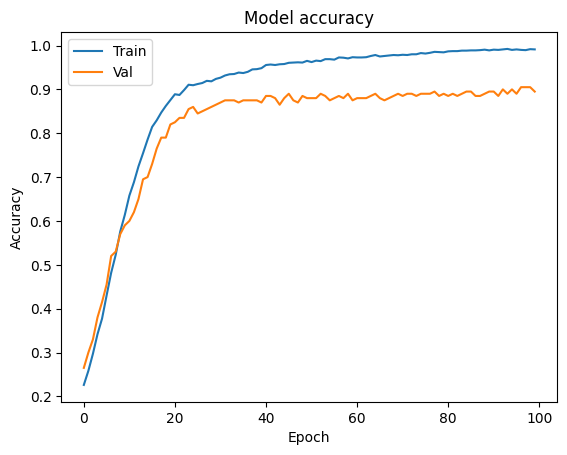

In [29]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

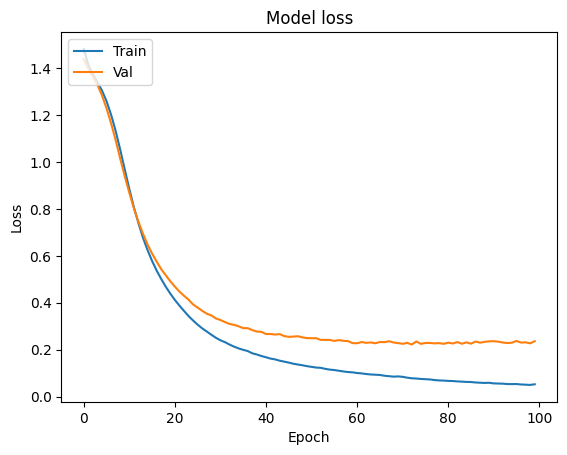

In [30]:
# Plot training and test loss
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss')
plt.xlabel('Epoch') 
plt.legend(['Train', 'Val'], loc='upper left') 
plt.show()

In [31]:
# Save the model
from pathlib import Path
path = Path('./models')
if not path.exists():
  path.mkdir()
model.save('./models/model_1.h5')

In [32]:
# List files of ./models directory
!ls ./models

model_1.h5


# Exercise 1: Train the model without normalization

In [33]:
# Split data without normalization in training and validation partitions

# Split data in training and validation partitions
X_train, X_val, y_train, y_val = train_test_split(X, y_onehot, 
                                                  test_size=0.1)


In [34]:
# Show sizes of partitions
print("Size of training data: ", X_train.shape)
print("Size of training labels: ", y_train.shape)
print("Size of validation data: ", X_val.shape)
print("Size of validation labels: ", y_val.shape)

Size of training data:  (1800, 20)
Size of training labels:  (1800, 4)
Size of validation data:  (200, 20)
Size of validation labels:  (200, 4)


In [37]:
# Plot training and validation accuracy
# Choose number of epochs and batch size and train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, 
                    validation_data=(X_val, y_val))


Epoch 1/100
29/29 [==============================] - 0s 6ms/step - loss: 15545.7188 - accuracy: 0.2517 - val_loss: 6200.7788 - val_accuracy: 0.2900
Epoch 2/100
29/29 [==============================] - 0s 4ms/step - loss: 3586.5659 - accuracy: 0.3150 - val_loss: 1228.4302 - val_accuracy: 0.4250
Epoch 3/100
29/29 [==============================] - 0s 5ms/step - loss: 852.4730 - accuracy: 0.4789 - val_loss: 596.0001 - val_accuracy: 0.5300
Epoch 4/100
29/29 [==============================] - 0s 5ms/step - loss: 554.7426 - accuracy: 0.5267 - val_loss: 423.6844 - val_accuracy: 0.5800
Epoch 5/100
29/29 [==============================] - 0s 5ms/step - loss: 405.9539 - accuracy: 0.5267 - val_loss: 321.0572 - val_accuracy: 0.5200
Epoch 6/100
29/29 [==============================] - 0s 4ms/step - loss: 304.9812 - accuracy: 0.5189 - val_loss: 244.1436 - val_accuracy: 0.5250
Epoch 7/100
29/29 [==============================] - 0s 5ms/step - loss: 228.6689 - accuracy: 0.5178 - val_loss: 171.9750 - v

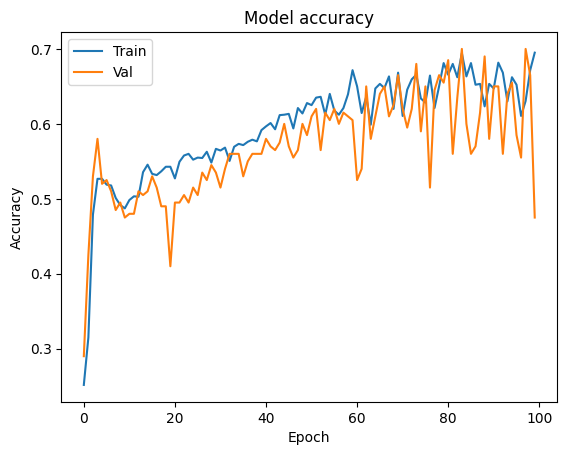

In [38]:
# Plot training and test loss
# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

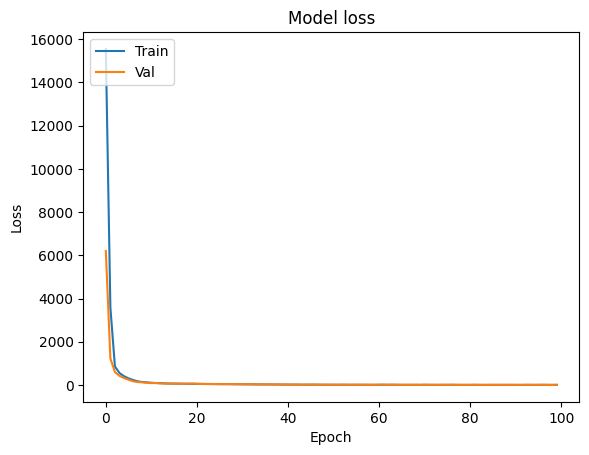

In [60]:
# Plot training and test loss
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss')
plt.xlabel('Epoch') 
plt.legend(['Train', 'Val'], loc='upper left') 
plt.show()

# Exercise 2: Train a simpler model and evaluate the results

In [61]:
# Split data with normalization in training and validation partitions

# Split data in training and validation partitions
X_train, X_val, y_train, y_val = train_test_split(X_norm, y_onehot, 
                                                  test_size=0.1)


In [64]:
# Design a model like the previous but without the second Dense layer
# Train the model
# Design simple neural network architecture

# Design simple neural network architecture
model = Sequential()
model.add(Dense(16, input_dim=20, activation='relu')) # Capa con 16 neuronas y 20 variables de entrada
model.add(Dense(4, activation='softmax')) # Softmax saca valores entre 0 y 1 (probabilidades)

In [65]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 16)                336       
                                                                 
 dense_6 (Dense)             (None, 4)                 68        
                                                                 
Total params: 404
Trainable params: 404
Non-trainable params: 0
_________________________________________________________________
None


In [66]:
# Compile the model
# Choose loss function, optimizer and training metrics
model.compile(loss='categorical_crossentropy', optimizer='adam', # No tocar el optimizador ya que es complejo de mejorar con otros. El optimizador 'adam' configura por defecto un valor de alpha. Si queremos cambiarlo porque entrena muy lento podemos cambiarlo
              metrics=['accuracy'])

In [67]:
# Train the model
# Choose number of epochs and batch size and train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, 
                    validation_data=(X_val, y_val))


Epoch 1/100
29/29 [==============================] - 3s 19ms/step - loss: 1.4160 - accuracy: 0.3772 - val_loss: 1.4629 - val_accuracy: 0.3200
Epoch 2/100
29/29 [==============================] - 0s 7ms/step - loss: 1.3172 - accuracy: 0.4144 - val_loss: 1.3781 - val_accuracy: 0.3400
Epoch 3/100
29/29 [==============================] - 0s 7ms/step - loss: 1.2382 - accuracy: 0.4578 - val_loss: 1.3047 - val_accuracy: 0.3700
Epoch 4/100
29/29 [==============================] - 0s 10ms/step - loss: 1.1696 - accuracy: 0.4928 - val_loss: 1.2411 - val_accuracy: 0.3900
Epoch 5/100
29/29 [==============================] - 0s 12ms/step - loss: 1.1083 - accuracy: 0.5261 - val_loss: 1.1847 - val_accuracy: 0.4250
Epoch 6/100
29/29 [==============================] - 0s 10ms/step - loss: 1.0518 - accuracy: 0.5639 - val_loss: 1.1353 - val_accuracy: 0.4600
Epoch 7/100
29/29 [==============================] - 0s 9ms/step - loss: 1.0012 - accuracy: 0.5900 - val_loss: 1.0879 - val_accuracy: 0.4900
Epoch 8/1

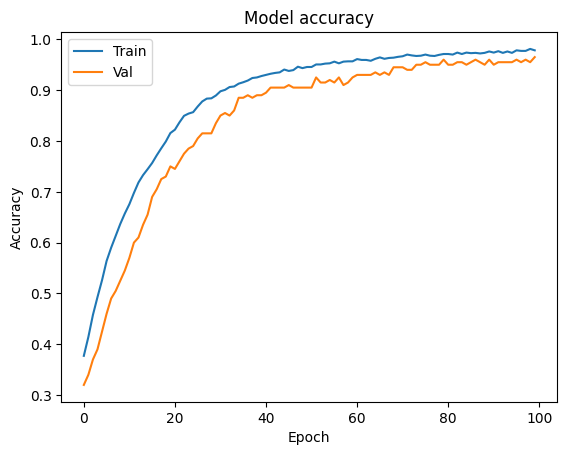

In [68]:
# Plot training and validation accuracy

# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

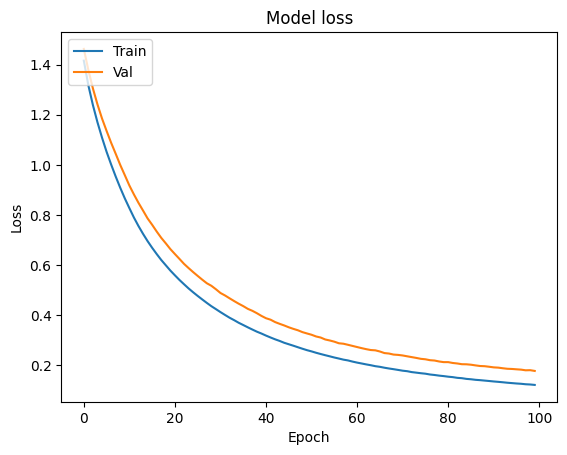

In [69]:
# Plot training and test loss
# Plot training and test loss
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss')
plt.xlabel('Epoch') 
plt.legend(['Train', 'Val'], loc='upper left') 
plt.show()

# Exercise 3: Train a more complex model and evaluate the results

In [70]:
# Split data with normalization in training and validation partitions

# Split data with normalization in training and validation partitions

# Split data in training and validation partitions
X_train, X_val, y_train, y_val = train_test_split(X_norm, y_onehot, 
                                                  test_size=0.1)


In [71]:
# Design a model like the previous but with 128 neurons in the first Dense layer
# and 256 in the second

# Design simple neural network architecture
model = Sequential()
model.add(Dense(128, input_dim=20, activation='relu')) # Capa con 16 neuronas y 20 variables de entrada
model.add(Dense(256, activation='relu'))
model.add(Dense(4, activation='softmax')) # Softmax saca valores entre 0 y 1 (probabilidades)

In [73]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 128)               2688      
                                                                 
 dense_8 (Dense)             (None, 256)               33024     
                                                                 
 dense_9 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 36,740
Trainable params: 36,740
Non-trainable params: 0
_________________________________________________________________
None


In [72]:
# Compile the model

# Compile the model
# Choose loss function, optimizer and training metrics
model.compile(loss='categorical_crossentropy', optimizer='adam', # No tocar el optimizador ya que es complejo de mejorar con otros. El optimizador 'adam' configura por defecto un valor de alpha. Si queremos cambiarlo porque entrena muy lento podemos cambiarlo
              metrics=['accuracy'])

In [74]:
# Train the model

# Train the model
# Choose number of epochs and batch size and train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, 
                    validation_data=(X_val, y_val))

Epoch 1/100
29/29 [==============================] - 3s 13ms/step - loss: 1.1417 - accuracy: 0.5061 - val_loss: 0.9168 - val_accuracy: 0.6150
Epoch 2/100
29/29 [==============================] - 0s 7ms/step - loss: 0.7072 - accuracy: 0.7711 - val_loss: 0.5706 - val_accuracy: 0.8100
Epoch 3/100
29/29 [==============================] - 0s 6ms/step - loss: 0.4566 - accuracy: 0.8806 - val_loss: 0.4039 - val_accuracy: 0.8700
Epoch 4/100
29/29 [==============================] - 0s 7ms/step - loss: 0.3213 - accuracy: 0.9217 - val_loss: 0.3131 - val_accuracy: 0.8850
Epoch 5/100
29/29 [==============================] - 0s 6ms/step - loss: 0.2399 - accuracy: 0.9494 - val_loss: 0.2450 - val_accuracy: 0.9300
Epoch 6/100
29/29 [==============================] - 0s 6ms/step - loss: 0.1989 - accuracy: 0.9483 - val_loss: 0.2144 - val_accuracy: 0.9300
Epoch 7/100
29/29 [==============================] - 0s 7ms/step - loss: 0.1653 - accuracy: 0.9578 - val_loss: 0.2120 - val_accuracy: 0.9300
Epoch 8/100


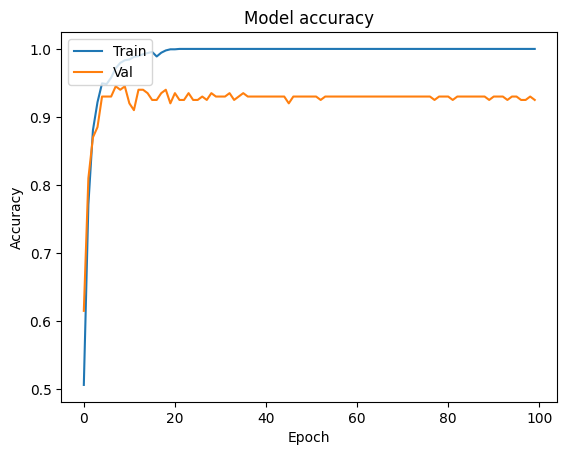

In [75]:
# Plot training and validation accuracy

# Plot training and validation accuracy

# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


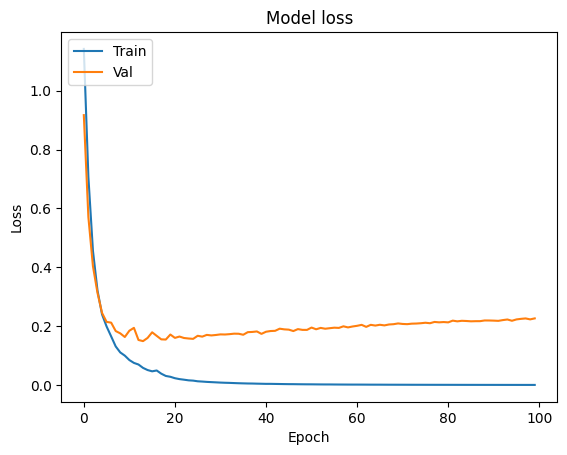

In [76]:
# Plot training and test loss

# Plot training and test loss
# Plot training and test loss
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss')
plt.xlabel('Epoch') 
plt.legend(['Train', 'Val'], loc='upper left') 
plt.show()


# Exercise 4: Predict the price range of the phones of the test.csv file

In [89]:
# Read it test data from csv

# Load training dataset and check variables
datatest = pd.read_csv('./data/test.csv')




In [90]:
# Show column names (pay attention, maybe there is something different)
# Show variables
datatest.columns

Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [97]:
datatest = datatest.drop('id', axis=1)

datatest.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [98]:
# Convert the data to numpy array
# Convert pandas Dataframe to Numpy Array
datatest_numpy = datatest.values

In [99]:
# Show shape of the data

print(datatest_numpy.shape)


(1000, 20)


In [100]:

# Separate input variables from output label
X = datatest_numpy[:, :20]
y = datatest_numpy[:, 20:21]

In [101]:
# Normalize data. Important!! Always normalize test data with the mean and
# standard deviation learnt from the training data.

# Normalizing the data to improve stability while training
X_norm = sc.transform(X)


In [102]:
# Show data before and after normalization
# Show data before and after normalization
print("Before normalization: \n", X[1, :])
print("After normalization: \n", X_norm[1, :])


Before normalization: 
 [8.410e+02 1.000e+00 5.000e-01 1.000e+00 4.000e+00 1.000e+00 6.100e+01
 8.000e-01 1.910e+02 5.000e+00 1.200e+01 7.460e+02 8.570e+02 3.895e+03
 6.000e+00 0.000e+00 7.000e+00 1.000e+00 0.000e+00 0.000e+00]
After normalization: 
 [-0.90487356  1.0100505  -1.2530642   0.98117712 -0.07130748  0.95788598
  1.59600992  1.03435682  1.43401659  0.20963905  0.34365317  0.22740333
 -0.91303718  1.63287318 -1.49720161 -1.32413127 -0.73426721  0.55964063
 -1.00601811 -1.01409939]


In [103]:
# Load model saved during the example
from keras.models import load_model
model = load_model('./models/model_1.h5')

In [104]:
# Predict price range
predictions = model.predict(X_norm)

32/32 [==============================] - 0s 2ms/step


In [105]:
# Show predictions
predictions

array([[2.5945297e-21, 2.4035175e-11, 8.9590627e-01, 1.0409374e-01],
       [2.0552795e-30, 3.3961661e-15, 1.9088682e-02, 9.8091125e-01],
       [3.5292715e-18, 3.7842993e-10, 1.6442734e-01, 8.3557266e-01],
       ...,
       [3.4528327e-01, 6.5471089e-01, 5.7582392e-06, 7.6915161e-24],
       [6.9680262e-10, 5.9859394e-03, 9.9401313e-01, 9.4972114e-07],
       [1.1611271e-16, 5.8650544e-06, 9.9998522e-01, 8.8989163e-06]],
      dtype=float32)

In [106]:
# Convert predictions to scalars from one-hot encoding
predictions_scalar = np.argmax(predictions, axis=1)

In [107]:
# Show all scalar predictions

predictions_scalar


array([2, 3, 3, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 1, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 1, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 0, 3, 1, 1, 3, 3, 2, 0, 1, 0, 1,
       1, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 0,
       3, 0, 1, 2, 2, 1, 2, 2, 0, 2, 1, 3, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 2, 3, 0, 0, 2, 2, 1, 2, 0, 3, 2, 3, 2, 0, 2,
       2, 1, 3, 1, 1, 0, 3, 2, 1, 2, 1, 2, 2, 3, 3, 3, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 2, 3, 2, 2, 3, 3, 3, 3, 0, 0, 3, 0, 0, 0, 2, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       2, 3, 1, 1, 3, 2, 3, 2, 2, 1, 0, 0, 1, 3, 0, 2, 2, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 3, 1, 3, 0, 3, 1, 3, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 0, 2, 2, 1, 1, 3, 2, 0, 3, 0, 1, 3, 0, 0, 3, 2, 3,
       2, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,

In [108]:
# Show the first test sample in Dataframe format
datatest.head(1)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0


In [110]:
# Show prediction for that sample
predictions_scalar[0]

2